## Homework 2: Data structures and data cleaning

In this homework you will have to apply the knowledge you have learned about tidy data from reading Wickham (2014). You will have to identify problems with the organization of example datasets using the terms introduced in Wickham. You will also have to tidy a dataset, and perform some basic cleaning operations. 

Before you begin, you will need to have completed the following requirements:
- Read Wickham (2014)
- If you haven't worked with the tidyverse package before, you need to install it with the `install.packages('tidyverse')` command
- Consult Tutorial 2, which explains the basic tidyverse commands for processing data: https://github.com/venpopov/DataSciencePsychUZH/blob/main/Tutorials/Tutorial02_Data_processing_with_R_and_tidyverse.ipynb

*Copy this notebook, the folder `data` and the folder `figures` in your repository, and type in your responses and/or code in the corresponding cells. Your homework will be scored based on the total number of points (30 total possible).*

Clarification: to copy the relevant files into your repository, you first need to download them to your computer. You can do that one of two ways. First, you can open a terminal and type `git clone https://github.com/venpopov/DataSciencePsychUZH`. This will copy the entire class repository on your local computer. Then you can locate the homework2 notebook, and the data/figures folders. Then you can copy and paste them into your own repository.

Alternatively, you can directly download all files from the repository by going to the main repository page on your browser and clicking on `Code > Download ZIP` as shown in the image below. This will download all repository files into a ZIP archive on your computer. Extract the files from the archive into a new folder. Then copy and paste the homework2 notebook, and the data/figures folders into your repository.

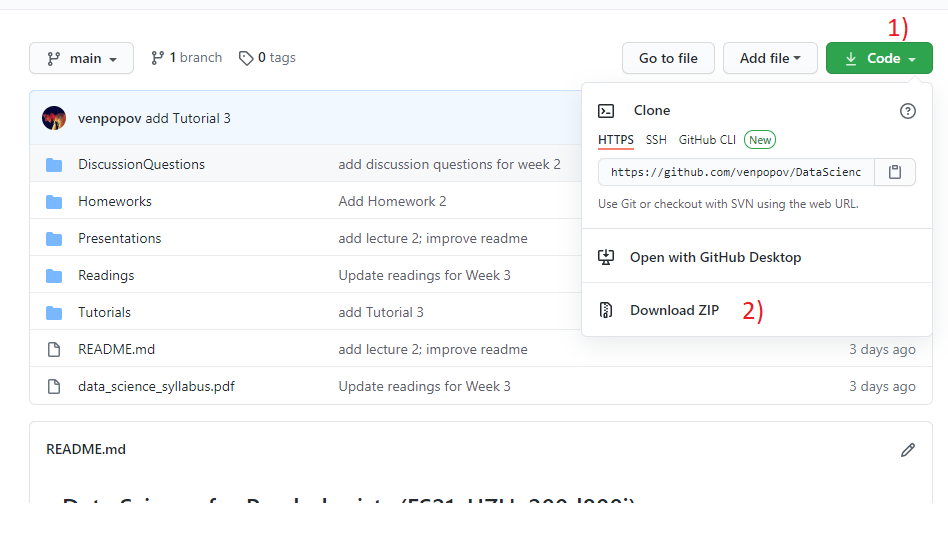


### 1. Identifying non-tidy datasets



#### 1.1 Problem 1
The dataset below shows demographic information, IQ and college grade point average for several students

In [1]:
iq_grade <- read.csv('data/iq_grade.csv')
iq_grade

subject_id,demographic_info,verbal_IQ,GPA
<int>,<chr>,<int>,<dbl>
101,"male, 23",105,3.9
102,"male, 19",121,3.2
103,"female, 27",123,3.4
104,"male, 21",97,2.8
105,"female, 21",93,2.9
106,"female, 25",135,3.8


This dataset is not in a tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:

> *multiple variables are stored in one column - gender and age are both in the demographic_info column*

What would you have to do to make this dataset in tidy format? **(1 point)**
> *split demographic_info into two columns - gender and age*

Write code in the cell below to transform the `iq_grades` table into tidy format 

(hint: use the separate() command from the tidyverse package - see Tutorial 2; **3 points**): 

In [2]:
library(tidyverse)   # load tidyverse package for the separate command
iq_grade_tidy <- iq_grade %>%
  separate(demographic_info, c('gender','age'), ',') # split demographic_info by the "," and save the result into two new columns, gender and age. 

head(iq_grade_tidy)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



,subject_id,gender,age,verbal_IQ,GPA
,<int>,<chr>,<chr>,<int>,<dbl>
1,101,male,23,105,3.9
2,102,male,19,121,3.2
3,103,female,27,123,3.4
4,104,male,21,97,2.8
5,105,female,21,93,2.9
6,106,female,25,135,3.8


#### 1.2 Problem 2
The dataset below shows statistics about violent crime rates by US state. The numbers represent frequency per 100,000 people. 

In [3]:
suppressMessages(library(tidyverse))

data("USArrests")
USArrests <- select(USArrests, -UrbanPop)
head(USArrests)

,Murder,Assault,Rape
,<dbl>,<int>,<dbl>
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6
Colorado,7.9,204,38.7


This dataset is not in a tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:

> *Column headers are values of "Type of crime", not variables. Also, states are saved in the row names, not as a variable.*

> **NOTE:** I did not notice that the state names are saved as row names when I wrote the homework. The solution below shows how to solve it, but I won't detract points if you didn't figure out how to solve it, since it was unintentional feature of the dataset

What would you have to do to make this dataset in tidy format? **(1 point)**
> melt the three columns and create two new columns - crime_type and crime_frequency

> save state names into a variable, not row names

Write code in the cell below to transform the `USArrests` table into tidy format 

(hint: use the gather() command from the tidyverse package - see Tutorial 2; **3 points**): 

In [4]:
USArrests <- USArrests %>%
    rownames_to_column("state") %>%  # put the state names into a variable called "state"
    gather(key = "crime_type", value = "crime_rate", Murder, Assault, Rape)  %>%  # melt 
    mutate(crime_type = as.factor(crime_type))  # make crime_type into a factor variable (good, but not required for full score)

head(USArrests)
str(USArrests)

,state,crime_type,crime_rate
,<chr>,<fct>,<dbl>
1,Alabama,Murder,13.2
2,Alaska,Murder,10.0
3,Arizona,Murder,8.1
4,Arkansas,Murder,8.8
5,California,Murder,9.0
6,Colorado,Murder,7.9


'data.frame':	150 obs. of  3 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ crime_type: Factor w/ 3 levels "Assault","Murder",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ crime_rate: num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...


#### 1.3 Problem 3

The three tables below give the measurements in centimeters of the variables sepal length, sepal width, petal length and petal width, respectively, for 50 flowers from each of 3 species of iris flowers. The species are setosa, versicolor, and virginica.

In [5]:
# load data
setosa <- read.csv('data/setosa.csv')
virginica <- read.csv('data/virginica.csv')
versicolor <- read.csv('data/versicolor.csv')

# look at the data
head(setosa)
head(virginica)
head(versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.3,3.3,6.0,2.5
2,5.8,2.7,5.1,1.9
3,7.1,3.0,5.9,2.1
4,6.3,2.9,5.6,1.8
5,6.5,3.0,5.8,2.2
6,7.6,3.0,6.6,2.1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,7.0,3.2,4.7,1.4
2,6.4,3.2,4.5,1.5
3,6.9,3.1,4.9,1.5
4,5.5,2.3,4.0,1.3
5,6.5,2.8,4.6,1.5
6,5.7,2.8,4.5,1.3


These tables are not in tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:
> The same observational unit is stored in separate tables. The same measurements are recorded in each table, the only thing that differs is the species.

What would you have to do to make this dataset in tidy format? **(1 point)**
> we should combine the three tables into one, and create a column that codes the species for each measurement.

> **NOTE**: this issue often happens when an experimental software saves the data from each participant in a separate file

Write code in the cell below to transform the `setosa`, `virginica` and `versicolor` tables into tidy format 

(hint: use the `bind_rows()` command from the tidyverse package; remember to include information about the species in tidy dataset; **3 points**): 

In [6]:
# solution 1 using the lst() command to create a named list, the names of which are then used by .id to assign the species
iris1 <- bind_rows(lst(setosa, virginica, versicolor), .id="species")
head(iris1)

# solution 2 using named arguments
iris2 <- bind_rows("setosa" = setosa, "virginica" = virginica, "versicolor" = versicolor, .id="species")
head(iris2)

,species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,setosa,5.1,3.5,1.4,0.2
2,setosa,4.9,3.0,1.4,0.2
3,setosa,4.7,3.2,1.3,0.2
4,setosa,4.6,3.1,1.5,0.2
5,setosa,5.0,3.6,1.4,0.2
6,setosa,5.4,3.9,1.7,0.4


,species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,setosa,5.1,3.5,1.4,0.2
2,setosa,4.9,3.0,1.4,0.2
3,setosa,4.7,3.2,1.3,0.2
4,setosa,4.6,3.1,1.5,0.2
5,setosa,5.0,3.6,1.4,0.2
6,setosa,5.4,3.9,1.7,0.4


### 2. Putting it all together

The files `basel_weather_2018.csv`, `basel_weather_2019.csv`, `basel_weather_2020.csv` in the folder `data` contain detailed information about the minimum, mean and maximum temperature in Basel, Switzerland for every hour of every day of the last three years.

The datasets have multiple structural issues. Combine your knowledge from the previous 3 problems to transform these datasets into a tidy format. The tidy format should allow you at the end to produce two plots:
1. average mean temperature as a function of a time of day
2. average maximum temperature as a function of month

When you are done, you should be able to produce the following two plots:

![max_temperature_plot](figures/basel_temp_by_month.png)
![mean_temperature_plot](figures/basel_temp_by_time_of_day.png)

First load the three dataset into three separate variables **(1 point)**:

In [7]:
basel18 <- read.csv('data/basel_weather_2018.csv')
basel19 <- read.csv('data/basel_weather_2019.csv')
basel20 <- read.csv('data/basel_weather_2020.csv')

Use the `head()` command to take a look at the first few rows of each dataset **(1 point)**:

In [8]:
head(basel18)
head(basel19)
head(basel20)

,timestamp,temperature_type,temperature
,<chr>,<chr>,<dbl>
1,20180101T0000,temperature_mean,10.500529
2,20180101T0000,temperature_min,7.500529
3,20180101T0000,temperature_max,15.500529
4,20180101T0100,temperature_mean,9.790529
5,20180101T0100,temperature_min,5.790529
6,20180101T0100,temperature_max,13.790529


,timestamp,temperature_type,temperature
,<chr>,<chr>,<dbl>
1,20190101T0000,temperature_mean,5.0505285
2,20190101T0000,temperature_min,0.0505285
3,20190101T0000,temperature_max,9.0505285
4,20190101T0100,temperature_mean,4.9005284
5,20190101T0100,temperature_min,2.9005284
6,20190101T0100,temperature_max,8.9005284


,timestamp,temperature_type,temperature
,<chr>,<chr>,<dbl>
1,20200101T0000,temperature_mean,1.4905287
2,20200101T0000,temperature_min,0.4905287
3,20200101T0000,temperature_max,3.4905287
4,20200101T0100,temperature_mean,1.6905286
5,20200101T0100,temperature_min,0.6905286
6,20200101T0100,temperature_max,6.6905286


Use the `bind_rows()` command to combine the three datasets into one **(1 point)**:

In [9]:
basel <- bind_rows(basel18, basel19, basel20)

Use the `spread()` command to transform the dataset such that the mean, maximum, and minimum temperatures are in separate columns **(2 points)**:

In [10]:
basel <- basel %>% spread(temperature_type, temperature)
head(basel)

,timestamp,temperature_max,temperature_mean,temperature_min
,<chr>,<dbl>,<dbl>,<dbl>
1,20180101T0000,15.500529,10.500529,7.500529
2,20180101T0100,13.790529,9.790529,5.790529
3,20180101T0200,9.970529,8.970529,6.970529
4,20180101T0300,11.690529,8.690529,5.690529
5,20180101T0400,11.960528,7.960528,6.960528
6,20180101T0500,9.360528,7.360529,3.360529


The variable `timestamp` contains in each row a single string that represents the year, month, day and time of day in a single value. For example, `20200708T0700` means that the temperature in this row was observed on July 8th, 2020 at 7am. Create four new columns in your combined dataset:
- Year
- Month
- Day
- Hour

and use the `substr()` command to extract the relevant information for each column from the `timestamp` variable. For example, `substr(temp_data$timestamp, 7, 8)` would extract the day from the timestamp. 

If you need help understanding the `substr()` command, [read this](https://stat.ethz.ch/R-manual/R-devel/library/base/html/substr.html)  **(2 points)**:

In [11]:
# substr creates character variables, rather than numeric variables, because timestamp is a character variable
# if we don't make them numeric here, ggplot would refuse to put a line through the dots

basel <- basel  %>% 
mutate(year = as.numeric(substr(timestamp, 1,4)),    
       month = as.numeric(substr(timestamp, 5,6)),
       day = as.numeric(substr(timestamp, 7,8)),
       hour = as.numeric(substr(timestamp, 10,11)))
head(basel)

,timestamp,temperature_max,temperature_mean,temperature_min,year,month,day,hour
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20180101T0000,15.500529,10.500529,7.500529,2018,1,1,0
2,20180101T0100,13.790529,9.790529,5.790529,2018,1,1,1
3,20180101T0200,9.970529,8.970529,6.970529,2018,1,1,2
4,20180101T0300,11.690529,8.690529,5.690529,2018,1,1,3
5,20180101T0400,11.960528,7.960528,6.960528,2018,1,1,4
6,20180101T0500,9.360528,7.360529,3.360529,2018,1,1,5


Create a new dataset `monthly_temp` using the `group_by()` and `summarise()` commands (see Tutorial 2, Section 5). The new dataset should contain the average maximum temperature for each month. It should have 12 rows and two variables - `month` and `max_temperature`. **(2 points)**

In [12]:
monthly_temp  <- basel  %>% 
 group_by(month)  %>% 
 summarise(max_temperature = mean(temperature_max))
monthly_temp

`summarise()` ungrouping output (override with `.groups` argument)



month,max_temperature
<dbl>,<dbl>
1,7.891313
2,8.284421
3,10.869633
4,16.536487
5,18.150847
6,22.937376
7,25.177438
8,25.101542
9,21.215122


Use the `ggplot()` command on your newly created `monthly_temp` summarized dataset to reproduce the first plot above. The x axis should show the month, and the y axis should show the average maximum temperature for each month. **(2 points)**

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



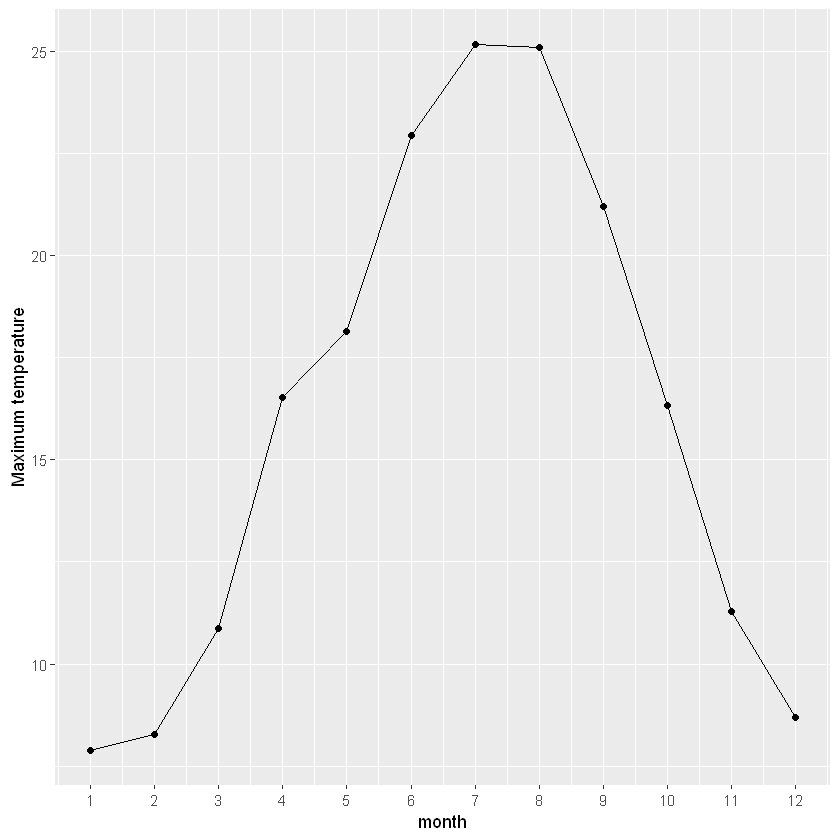

In [13]:
ggplot(monthly_temp, aes(month, max_temperature)) +
    stat_summary(geom="point") +
    stat_summary(geom="line") +
    scale_x_continuous(breaks=1:12) +
    ylab("Maximum temperature")

# if you hadn't made variables numeric, you won't see a line through the points. 
# In that case, you could fix it by replacing the command above with:
# ggplot(monthly_temp, aes(month, max_temperature, group=1)) +
#    stat_summary(geom="point") +
#    stat_summary(geom="line") +
#    scale_x_continuous(breaks=1:12) +
#    ylab("Maximum temperature")

Create a new dataset `hourly_temp` using the `group_by()` and `summarise()` commands. The new dataset should contain the average mean temperature for each hour. It should have 24 rows and two variables - `hour` and `mean_temperature`. **(2 points)**

In [14]:
hourly_temp  <- basel  %>% 
 group_by(hour)  %>% 
 summarise(mean_temperature = mean(temperature_mean))
hourly_temp

`summarise()` ungrouping output (override with `.groups` argument)



hour,mean_temperature
<dbl>,<dbl>
0,11.316697
1,10.881870
2,10.531542
3,10.142591
4,9.811660
5,9.560383
6,9.509781
7,9.854270
8,10.675766


Use the `ggplot()` command on your newly created `hourly_temp` summarized dataset to reproduce the second plot above. The x axis should show the time of day (hour), and the y axis should show the average mean temperature for each time of day. **(2 points)**

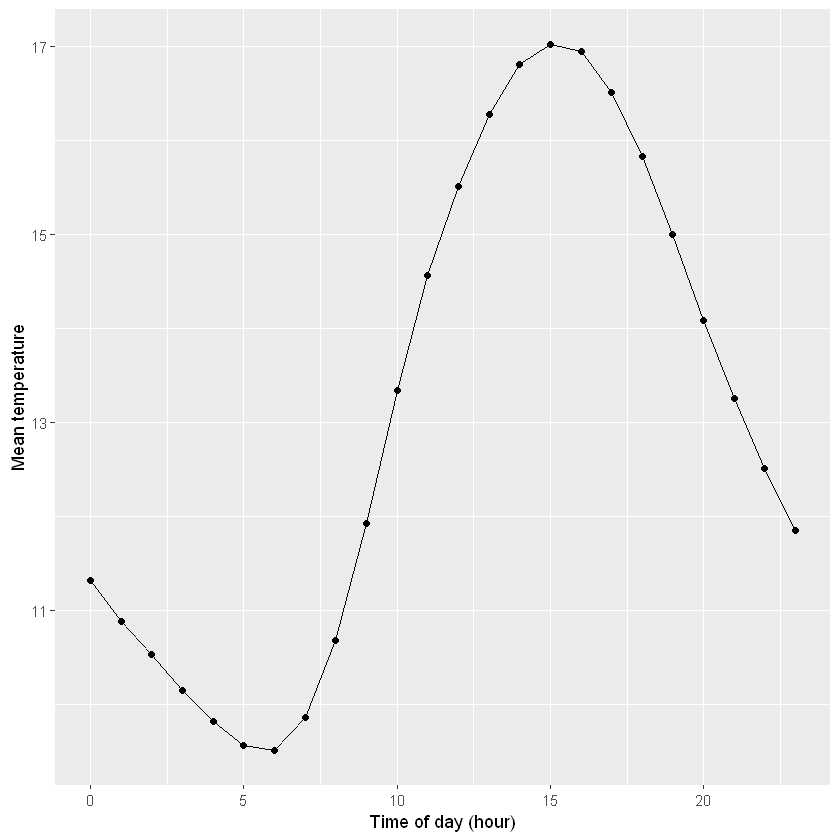

In [15]:
ggplot(hourly_temp, aes(hour, mean_temperature)) +
    geom_point() +
    geom_line() +
    xlab('Time of day (hour)') +
    ylab('Mean temperature')

### Alternative solutions

`ggplot()` has in-built functions for summarizing data, so that you don't have to group and summarize before plotting. This is achieved with the `stat_summary()` command instead of the `geom_point()` command:

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



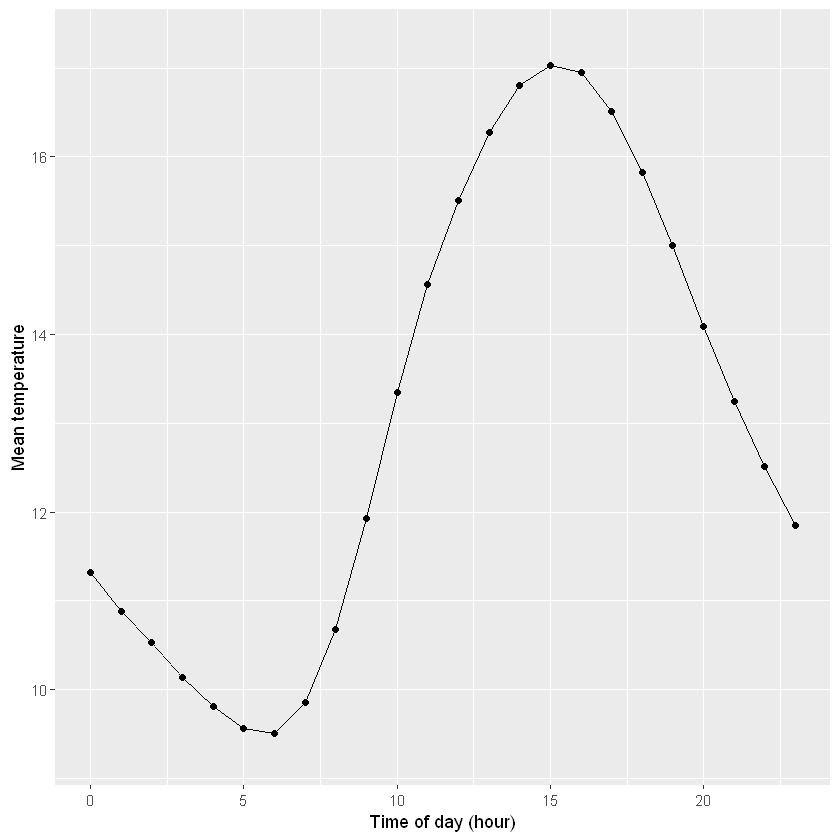

In [16]:
ggplot(basel, aes(hour, temperature_mean)) +  # note we are using the unsummarized dataset basel
    stat_summary(geom='point') +
    stat_summary(geom='line') +
    xlab('Time of day (hour)') +
    ylab('Mean temperature')